# Background Sculpting Cuts

**Idea:** The current iteration of the analyis significantly sculpts the background, so I kind of want to unfold the cuts one-by-one to see *which* ones are sculpting the background this way, and compare with how these cuts affect the evolution of our signal.

I think it would be fun to look at the evolution of a lot of the kinematic variables, but Michael told me for starters the ones that I want to focus on are:
1. $m_{hh}$
2. $m_{HC1}$ and $m_{HC2}$

As a background estimate, I'm just going to take the data that passed these same selection criteria, and Michael said it's fine that some of our signal region is leaking in as well, so long as we don't look after the $X_{hh}$ cut, because there are so few events that this contribution is insignificant.

I think there is are two versions of these plots that I'm going to want to make
1. With all the background overlaid as I apply the cuts
2. Overlaying the signal and background for each choice of the cuts

(Or maybe I should make super dense plots and put this all together?)

In [13]:
from root_numpy import root2array 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec


The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [2]:
fDir = "../../hh4b-resolved-reconstruction/btagStudies/"
sigName = "SM_NR.root"
dataName = "data_15.root"


In [3]:
prefix = 'event_'
myVars = ['m_hh','m_h1','pT_h1','m_h2','pT_h2']

nBins = [50]*5
myRanges = [(0,1000),(0,300),(0,750),(0,300),(0,750)]

Start off by overlaying data and background separately for each cut

I also need to select jets with at least 4 b-tags because the dataframes printed out by resolved-recon.cpp only require $\geq 2$ b-tags.

In [4]:
trees = ['afterPairing','MDpTcut','detaHCs','Xwt','fullmassplane']
cuts = ['$\Delta R_{jj}$ (MDR)', '$p_T$ HCs (MDC)', 
        '$|\Delta \eta_{hh}| < 1.5$', '$X_{Wt} < 1.5$', 'Trigger']
colors = ['C0', 'gold', 'red', 'blue', 'black']

Looking at  SM_NR.root
  Opening afterPairing
  Opening MDpTcut
  Opening detaHCs
  Opening Xwt
  Opening fullmassplane
Looking at  data_15.root
  Opening afterPairing
  Opening MDpTcut
  Opening detaHCs
  Opening Xwt
  Opening fullmassplane


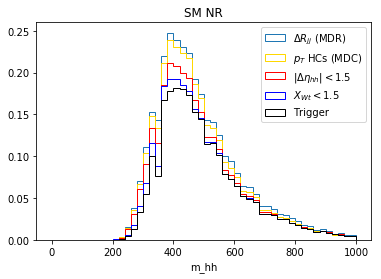

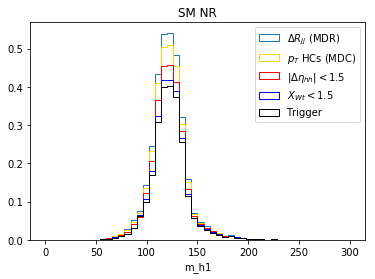

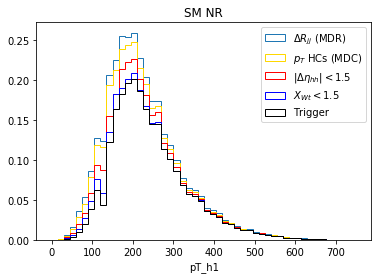

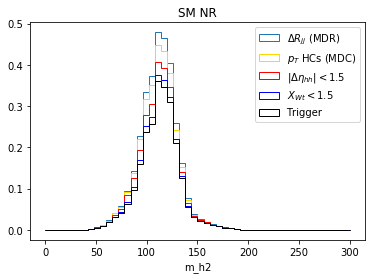

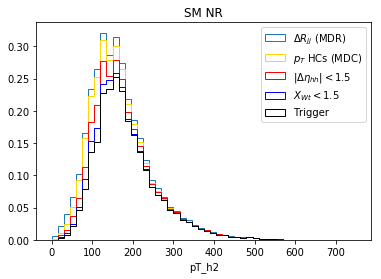

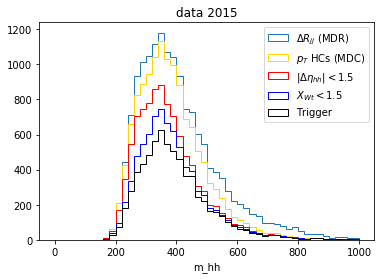

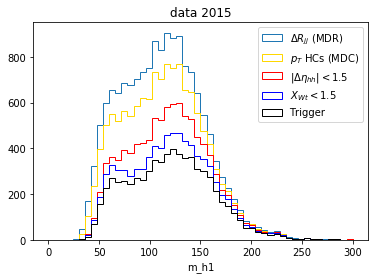

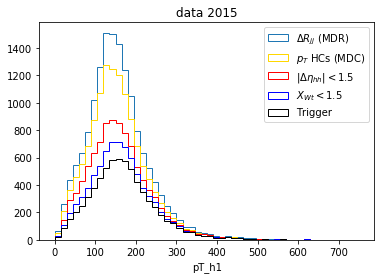

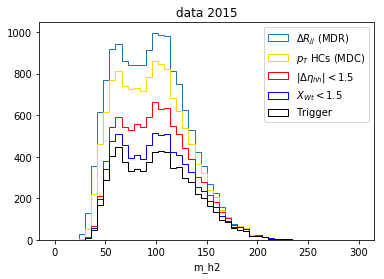

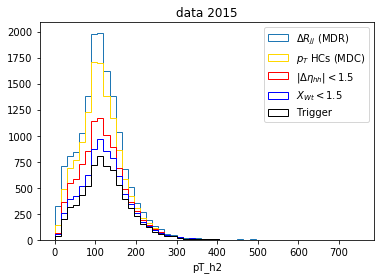

In [5]:
for fi,fname,title,subDir in zip([0,1],[sigName,dataName],['SM NR','data 2015'],['SM_NR','data_15']):

    print('Looking at ',fname)
    
    for treeName, label, c in zip(trees,cuts,colors):
    
        print('  Opening',treeName)
    
        # Load in the df
        df = pd.DataFrame(root2array(fDir + fname, treeName))
        df_4b = df[df.ntag >= 4]
        
        for i, (myVar,N,r) in enumerate(zip(myVars,nBins,myRanges)):
            
            plt.figure(fi*len(myVars)+i)

            plt.hist(df_4b[prefix+myVar],bins=N,range=r,
                     color=c,label=label,
                     histtype='step',weights=df_4b.mc_sf)
            
            # Make the plots pretty!
            if treeName == 'fullmassplane':
                plt.xlabel(myVar)
                plt.title(title)
                plt.legend()
                plt.savefig('figures/{}/{}.pdf'.format(subDir,myVar),bbox_inches='tight')
            
plt.show()

In [6]:
df.columns

Index(['run_number', 'event_number', 'ntag', 'njets', 'mc_sf', 'event_m_hh',
       'event_pt_hh', 'event_m_h1', 'event_E_h1', 'event_pT_h1',
       'event_eta_h1', 'event_phi_h1', 'event_m_h2', 'event_E_h2',
       'event_pT_h2', 'event_eta_h2', 'event_phi_h2', 'event_m_h1_j1',
       'event_E_h1_j1', 'event_pT_h1_j1', 'event_eta_h1_j1', 'event_phi_h1_j1',
       'event_angle_h1_j1', 'event_m_h1_j2', 'event_E_h1_j2', 'event_pT_h1_j2',
       'event_eta_h1_j2', 'event_phi_h1_j2', 'event_angle_h1_j2',
       'event_m_h2_j1', 'event_E_h2_j1', 'event_pT_h2_j1', 'event_eta_h2_j1',
       'event_phi_h2_j1', 'event_angle_h2_j1', 'event_m_h2_j2',
       'event_E_h2_j2', 'event_pT_h2_j2', 'event_eta_h2_j2', 'event_phi_h2_j2',
       'event_angle_h2_j2', 'event_tag_h1_j1', 'event_tag_h1_j2',
       'event_tag_h2_j1', 'event_tag_h2_j2', 'rwgt_pT_4', 'rwgt_pT_2',
       'rwgt_eta_i', 'rwgt_dRjj_1', 'rwgt_dRjj_2'],
      dtype='object')

### Jet multiplicity

Michael also wanted me to look at how these distributions evolved as a function of the jet multiplicity in the event to see whether or not we should have different analysis categories for events with 4 or 5 b-tags.

As a first step, plot the jet multiplicity for the data and SM NR.

For this plot, I'm going to use the last df with the fullmassplane.

Looking at  SM_NR.root
Looking at  data_15.root


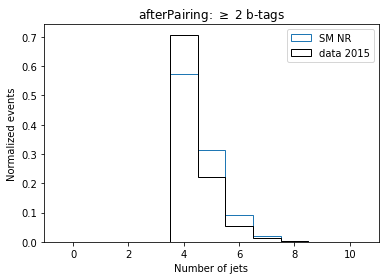

In [29]:
treeName = 'afterPairing'

for fname, label, c in zip([sigName,dataName],['SM NR','data 2015'],['C0','k']):

    print('Looking at ',fname)

    # Load in the df
    df = pd.DataFrame(root2array(fDir + fname, treeName))

    plt.hist(df['njets'],bins=11,range=(-0.5,10.5),
             color=c,label=label,density=True,
             histtype='step',weights=df.mc_sf)

plt.xlabel('Number of jets')
plt.ylabel('Normalized events')
plt.title('{}: $\geq$ 2 b-tags'.format(treeName))
plt.legend()
plt.savefig('figures/{}_nJets.pdf'.format(treeName),bbox_inches='tight')

plt.show()

Then as a second step, overlay how this looks as a function of the number of tags in the event.

Looking at  SM_NR.root
Looking at  data_15.root


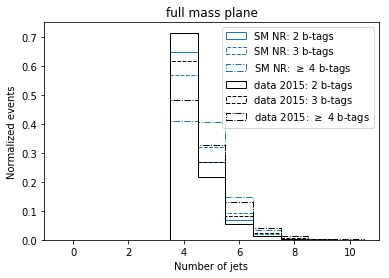

In [30]:
for fname, l1, c in zip([sigName,dataName],['SM NR','data 2015'],['C0','k']):

    print('Looking at ',fname)

    # Load in the df
    df = pd.DataFrame(root2array(fDir + fname, treeName))

    for mask, s, l2 in zip([(df.ntag==2),(df.ntag==3),(df.ntag>=4)],
                           ['-','--','-.'],
                           ['2 b-tags','3 b-tags','$\geq$ 4 b-tags']):
        
        label = l1 + ': ' + l2
        
        plt.hist(df.loc[mask,'njets'],bins=11,range=(-0.5,10.5),
                 color=c,label=label,density=True,linestyle=s,
                 histtype='step',weights=df.loc[mask,'mc_sf'])

plt.xlabel('Number of jets')
plt.ylabel('Normalized events')
plt.title('full mass plane')
plt.legend()
plt.savefig('figures/{}_nJets_bTags.pdf'.format(treeName),bbox_inches='tight')

plt.show()

**Conclusion:** Events with more b-tags also tend to have more jets.

As a third step, see if this background sculpting had any dependence on the number of jets as well.

To do this, I'm going to make plots of the full mass plane with the same kinematic variables that I was looking at above, but this time dividing events based on their jet multiplicity, again looking at events with exactly 4 b-tags.

Looking at  SM_NR.root


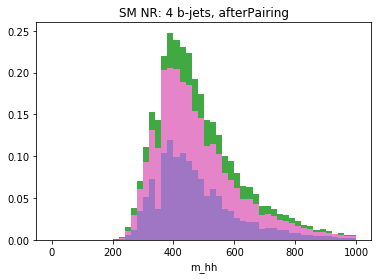

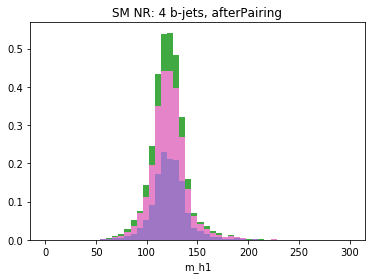

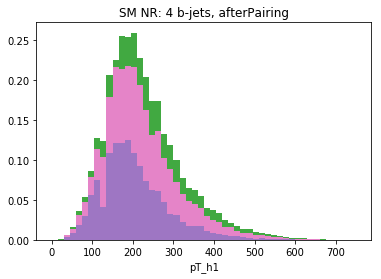

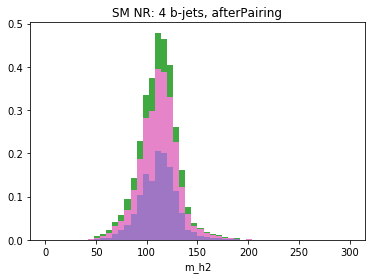

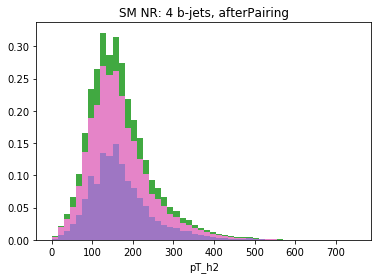

Looking at  data_15.root


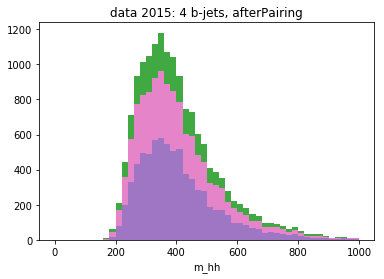

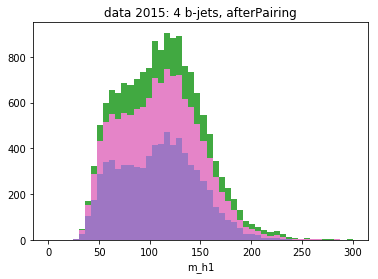

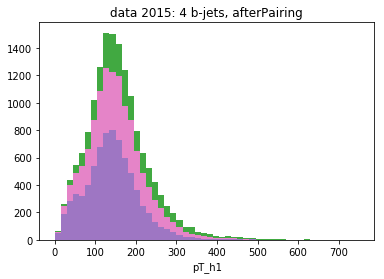

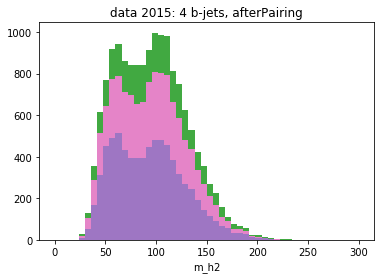

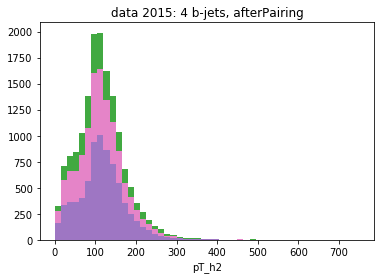

In [28]:
colors = ['C4','C6','C2']
labels = ['4 jets','5 jets','$\geq$ 6 jets']

for fname,title,subDir in zip([sigName,dataName],['SM NR','data 2015'],['SM_NR','data_15']):

    print('Looking at ',fname)
    
    # Load in the df
    df = pd.DataFrame(root2array(fDir + fname, treeName))
    df_4b = df[df.ntag >= 4]

    for i, (myVar,N,r) in enumerate(zip(myVars,nBins,myRanges)):

        masks = [(df_4b.njets==4),(df_4b.njets==5),(df_4b.njets>=6)]
        hists = [df_4b.loc[m,prefix+myVar] for m in masks]
        weights = [df_4b.loc[m,'mc_sf'] for m in masks]
        
        plt.figure()
        n,edg,_ = plt.hist(hists,bins=N,range=r,weights=weights, alpha=0.9, 
                           color=colors,label=labels,stacked=True)

        plt.xlabel(myVar)
        plt.title(title + ': 4 b-jets, {}'.format(treeName))
        
        # Avoid showing the negative weights
        _,ymax = plt.ylim()
        plt.ylim(0,ymax)
        
        plt.savefig('figures/{}/{}_{}_jetMult.pdf'.format(subDir,myVar,treeName),bbox_inches='tight') 
        plt.show()



Looking at  SM_NR.root


/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


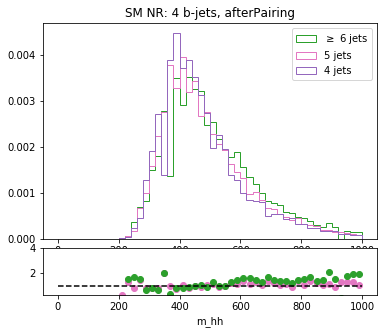

/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


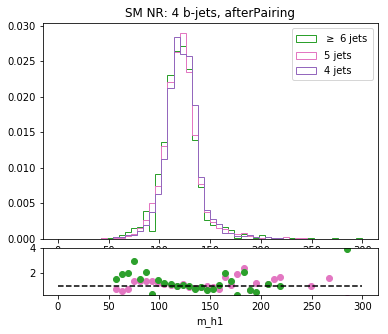

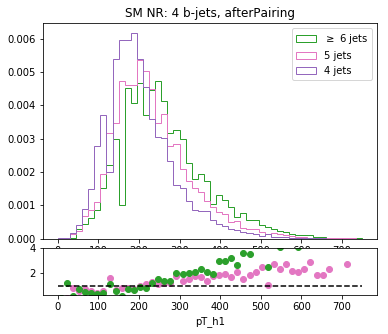

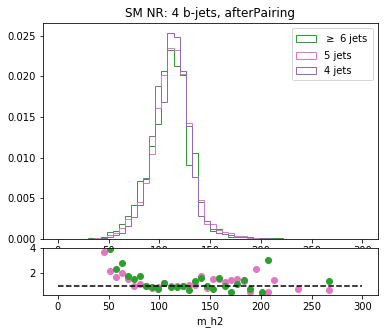

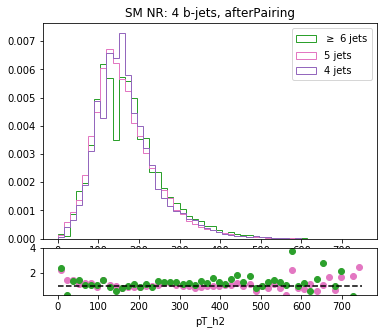

Looking at  data_15.root


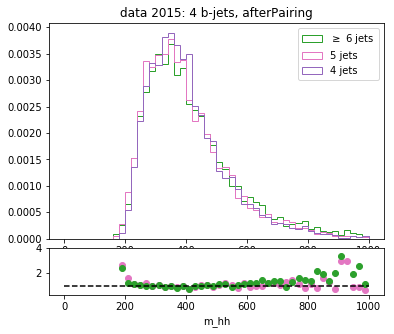

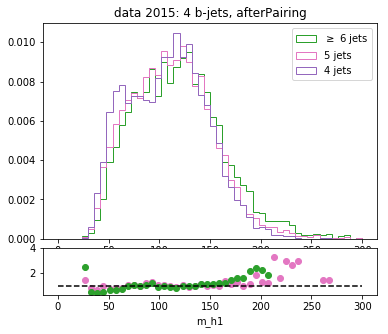

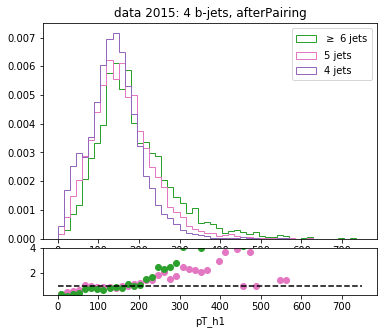

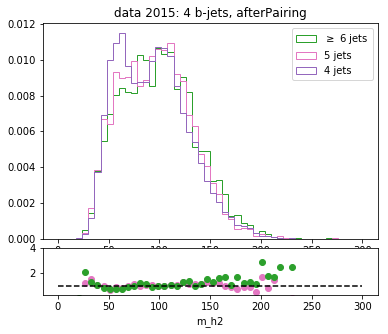

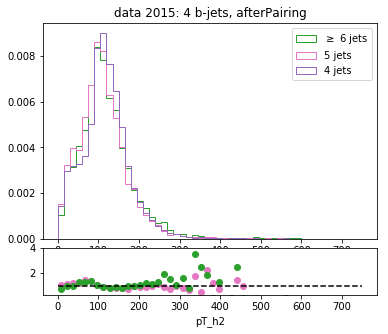

In [23]:
for fname,title,subDir in zip([sigName,dataName],['SM NR','data 2015'],['SM_NR','data_15']):

    print('Looking at ',fname)
    
    # Load in the df
    df = pd.DataFrame(root2array(fDir + fname, treeName))
    df_4b = df[df.ntag >= 4]

    for i, (myVar,N,r) in enumerate(zip(myVars,nBins,myRanges)):

        masks = [(df_4b.njets==4),(df_4b.njets==5),(df_4b.njets>=6)]
        hists = [df_4b.loc[m,prefix+myVar] for m in masks]
        weights = [df_4b.loc[m,'mc_sf'] for m in masks]
        
        #plt.figure()
        
        fig = plt.figure(figsize=(6,5))
        gs = gridspec.GridSpec(5,1)
        ax1 = fig.add_subplot(gs[:4,0])
        ax2 = fig.add_subplot(gs[4:,0],sharex=ax1)

        n,edg,_ = ax1.hist(hists,bins=N,range=r,weights=weights, density=True, 
                           color=colors,label=labels,histtype='step')

        # Normalize the n-bins, because I think 
        
        x = 0.5 * (edg[:-1]+edg[1:])
        for ni,c in zip(n[1:],colors[1:]):
            ax2.scatter(x, ni / n[0], color=c)
        
        ax2.set_xlabel(myVar)
        ax1.set_title(title + ': 4 b-jets, {}'.format(treeName))
        ax1.legend()
        
        # Avoid showing the negative weights
        _,ymax = ax1.get_ylim()
        ax1.set_ylim(0,ymax)
        ax2.set_ylim(0.25,4)
        
        ax2.plot(r,[1,1],'k--')
        
        plt.savefig('figures/{}/{}_{}_jetMult_ratio.pdf'.format(subDir,myVar,treeName),bbox_inches='tight') 
        plt.show()


Finally, I saw in the pairing studies that it seemed like I had a better pairing probability when I looked at jets with more b-tags, and Michael said this meant maybe I should look into this as a function of # of b-tags.

I could look at the background sculpting as a function of the number of b-tags as well?

But also, # of b-tags is probably correlated w/ jet multiplicity?

Looking at  SM_NR.root


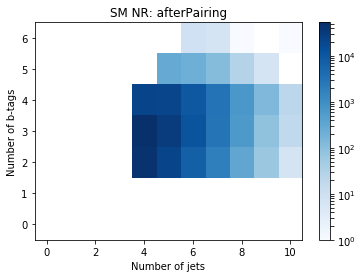

Looking at  data_15.root


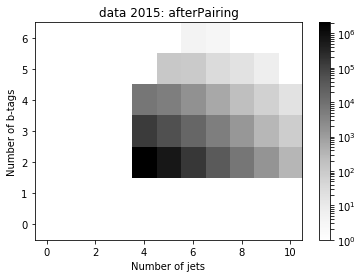

In [33]:
for fname, label, cmap, subDir in zip([sigName,dataName], ['SM NR','data 2015'],
                                            ['Blues','Greys'], ['SM_NR','data_15']):

    print('Looking at ',fname)

    # Load in the df
    df = pd.DataFrame(root2array(fDir + fname, treeName))

    plt.figure()
    plt.hist2d(df.njets,df.ntag, cmap=cmap, norm=LogNorm(),
               bins=[11,7],range=[(-0.5,10.5),(-0.5,6.5)])
    plt.xlabel('Number of jets')
    plt.ylabel('Number of b-tags')
    plt.title(label + ': {}'.format(treeName))
    plt.colorbar()
    plt.savefig('figures/{}/{}_bTags_vs_nJets.pdf'.format(subDir,treeName),bbox_inches='tight')
    
    plt.show()